In [9]:
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# "Buy a computer" Data Set

In [10]:
df = pd.read_csv('buys_a_computer.csv')

In [11]:
df

RID          age  income student credit_rating buys_computer
0     1        youth    high      no          fair            no
1     2        youth    high      no     excellent            no
2     3  middle_aged    high      no          fair           yes
3     4       senior  medium      no          fair           yes
4     5       senior     low     yes          fair           yes
5     6       senior     low     yes     excellent            no
6     7  middle_aged     low     yes     excellent           yes
7     8        youth  medium      no          fair            no
8     9        youth     low     yes          fair           yes
9    10       senior  medium     yes          fair           yes
10   11        youth  medium     yes     excellent           yes
11   12  middle_aged  medium      no     excellent           yes
12   13  middle_aged    high     yes          fair           yes
13   14       senior  medium      no     excellent            no

# Converting the categorical data into numerical values

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = df[['age', 'income', 'student', 'credit_rating']]
y = df['buys_computer']
enc.fit(X)

OrdinalEncoder()

In [13]:
enc.categories_

[array(['middle_aged', 'senior', 'youth'], dtype=object),
 array(['high', 'low', 'medium'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['excellent', 'fair'], dtype=object)]

# Building a decision tree

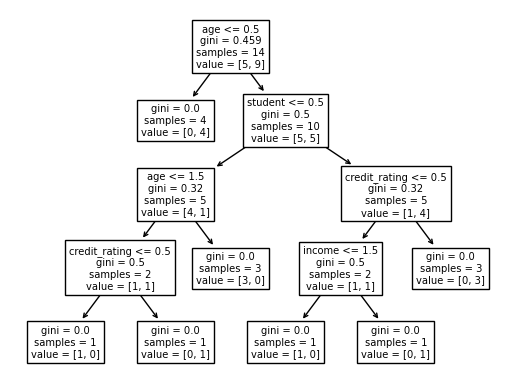

In [14]:
clf = DecisionTreeClassifier(random_state=0, criterion = 'gini')

X = pd.DataFrame(enc.transform(X), 
                columns = ['age', 'income', 'student', 'credit_rating'])

clf.fit(X, y)
_ = plot_tree(clf, feature_names = ['age', 'income', 'student', 'credit_rating'])

In [15]:
def get_overall_gini(df, attr, label, all_classes):
    attrs = df[attr].unique()
    df_rep = []
    for i in attrs:
        t = []
        t.append(i)
        t.append(df[df[attr] == i].shape[0])
        t.append(df[df[attr] ==  i].shape[0] / df.shape[0])
        
        classes = df[df[attr] ==  i][label].unique()

        p_sq = []

        for j in all_classes:

            if j in classes:
                p = df[(df[attr] ==  i) & (df[label] == j)].shape[0] / \
                df[df[attr] ==  i].shape[0]
            else:
                p = 0
            t.append(p)
            p_sq.append(p**2)

        t.append(str(1 - sum(p_sq))) # gini impurity coefficient

        df_rep.append(t)
        
    df_rep = pd.DataFrame(data = df_rep, columns = ['attr', '#', 'p(attr)', 'p(no|attr)', 'p(yes|attr)', 'gini'])
    l = []
    for i in df_rep.iterrows():
        l.append((float(i[1].loc['p(attr)']) *  float(i[1].loc['gini'])))
    
    return df_rep, sum(l)

# Gini impurity left after we split on an attribute 

### Showing values one by one

In [16]:
all_classes = df['buys_computer'].unique()
for i in ['age', 'income', 'student', 'credit_rating']:
    rtn = get_overall_gini(df, i, 'buys_computer', all_classes)
    print(i, '\t', rtn[1])

age 	 0.34285714285714286
income 	 0.44047619047619047
student 	 0.3673469387755103
credit_rating 	 0.42857142857142855


In [17]:
rtn = get_overall_gini(df, 'age', 'buys_computer', all_classes)

# Next we would see where to split on the age attribute

### In the table below, you are seeing how much gini impurity is there for records from each attribute. And we select that attribute which gives the minimum gini.

In [18]:
rtn[0]

attr  #   p(attr)  p(no|attr)  p(yes|attr)  gini
0        youth  5  0.357143         0.6          0.4  0.48
1  middle_aged  4  0.285714         0.0          1.0   0.0
2       senior  5  0.357143         0.4          0.6  0.48

# Splitting on age == middle_aged 
# And age != middle_aged

### Data for (age == middle_aged) goes on the left branch as seen in the decision tree above.
### And data for (age != middle_aged) goes on the right branch.

In [19]:
df_middle_aged = df[df['age'] == 'middle_aged']

In [20]:
df_middle_aged

RID          age  income student credit_rating buys_computer
2     3  middle_aged    high      no          fair           yes
6     7  middle_aged     low     yes     excellent           yes
11   12  middle_aged  medium      no     excellent           yes
12   13  middle_aged    high     yes          fair           yes

In [21]:
all_classes = df['buys_computer'].unique()
for i in ['age', 'income', 'student', 'credit_rating']:
    rtn = get_overall_gini(df_middle_aged, 'age', 'buys_computer', all_classes)
    print(i, rtn[1])

age 0.0
income 0.0
student 0.0
credit_rating 0.0


In [22]:
df_not_middle_aged = df[df['age'] != 'middle_aged']

In [23]:
df_not_middle_aged

RID     age  income student credit_rating buys_computer
0     1   youth    high      no          fair            no
1     2   youth    high      no     excellent            no
3     4  senior  medium      no          fair           yes
4     5  senior     low     yes          fair           yes
5     6  senior     low     yes     excellent            no
7     8   youth  medium      no          fair            no
8     9   youth     low     yes          fair           yes
9    10  senior  medium     yes          fair           yes
10   11   youth  medium     yes     excellent           yes
13   14  senior  medium      no     excellent            no

# Gini impurity left if we split on an attribute (viz. age, income, student, credit_rating)

In [24]:
all_classes = df['buys_computer'].unique()
for i in ['age', 'income', 'student', 'credit_rating']:
    rtn = get_overall_gini(df_not_middle_aged, i, 'buys_computer', all_classes)
    print(i, '\t', rtn[1])

age 	 0.48
income 	 0.3733333333333333
student 	 0.31999999999999984
credit_rating 	 0.4166666666666667


In [25]:
rtn = get_overall_gini(df_not_middle_aged, 'student', 'buys_computer', all_classes)

In [26]:
rtn[0]

attr  #  p(attr)  p(no|attr)  p(yes|attr)                 gini
0   no  5      0.5         0.8          0.2  0.31999999999999984
1  yes  5      0.5         0.2          0.8  0.31999999999999984

# Decision tree when age != middle_aged

[array(['senior', 'youth'], dtype=object), array(['high', 'low', 'medium'], dtype=object), array(['no', 'yes'], dtype=object), array(['excellent', 'fair'], dtype=object)]


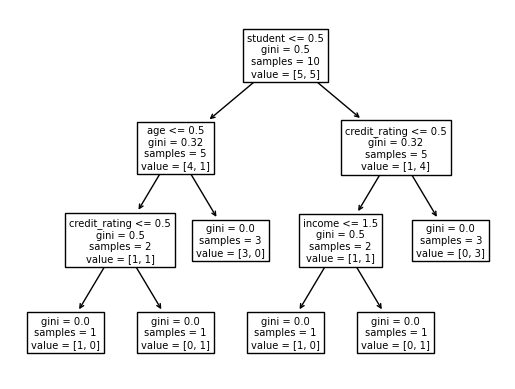

In [27]:
clf = DecisionTreeClassifier(random_state=0, criterion = 'gini')

X = df_not_middle_aged[['age', 'income', 'student', 'credit_rating']]
y = df_not_middle_aged['buys_computer']

enc = OrdinalEncoder()
X = enc.fit_transform(X)

print(enc.categories_)

clf.fit(X, y)
_ = plot_tree(clf, feature_names = ['age', 'income', 'student', 'credit_rating'])

# age != middle_aged and student == 0 or no

In [28]:
df_temp = df[(df['age'] != 'middle_aged') & (df['student'] == 'no')]

In [29]:
df_temp

RID     age  income student credit_rating buys_computer
0     1   youth    high      no          fair            no
1     2   youth    high      no     excellent            no
3     4  senior  medium      no          fair           yes
7     8   youth  medium      no          fair            no
13   14  senior  medium      no     excellent            no

In [32]:
for i in ['age', 'income', 'student', 'credit_rating']:
    rtn = get_overall_gini(df_temp, i, 'buys_computer', all_classes)
    print(i, '\t', rtn[1])

age 	 0.2
income 	 0.26666666666666666
student 	 0.31999999999999984
credit_rating 	 0.26666666666666666


### We see next split on this branch would be on 'age' where the impurity is the least.

[array(['senior', 'youth'], dtype=object), array(['high', 'medium'], dtype=object), array(['no'], dtype=object), array(['excellent', 'fair'], dtype=object)]


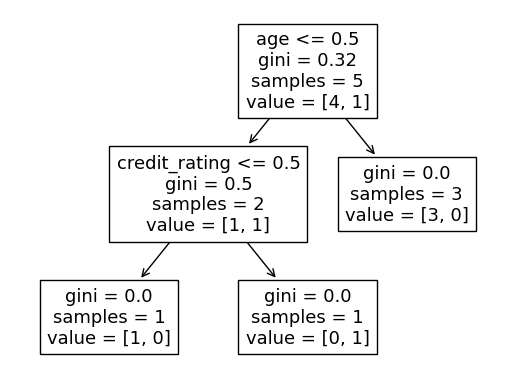

In [31]:
clf = DecisionTreeClassifier(random_state=0, criterion = 'gini')

X = df_temp[['age', 'income', 'student', 'credit_rating']]
y = df_temp['buys_computer']

enc = OrdinalEncoder()
X = enc.fit_transform(X)

print(enc.categories_)

clf.fit(X, y)
_ = plot_tree(clf, feature_names = ['age', 'income', 'student', 'credit_rating'])

# age != middle_aged and student == 1 or yes

In [184]:
df_temp = df[(df['age'] != 'middle_aged') & (df['student'] == 'yes')]

In [185]:
df_temp

RID     age  income student credit_rating buys_computer
4     5  senior     low     yes          fair           yes
5     6  senior     low     yes     excellent            no
8     9   youth     low     yes          fair           yes
9    10  senior  medium     yes          fair           yes
10   11   youth  medium     yes     excellent           yes

In [186]:
df_temp

RID     age  income student credit_rating buys_computer
4     5  senior     low     yes          fair           yes
5     6  senior     low     yes     excellent            no
8     9   youth     low     yes          fair           yes
9    10  senior  medium     yes          fair           yes
10   11   youth  medium     yes     excellent           yes

In [187]:
for i in ['age', 'income', 'student', 'credit_rating']:
    rtn = get_overall_gini(df_temp, i, 'buys_computer', all_classes)
    print(i, rtn[1])

age 0.26666666666666666
income 0.26666666666666666
student 0.31999999999999984
credit_rating 0.2


### We see next split on this branch would be on 'credit' where the impurity is the least.

[array(['senior', 'youth'], dtype=object), array(['low', 'medium'], dtype=object), array(['yes'], dtype=object), array(['excellent', 'fair'], dtype=object)]


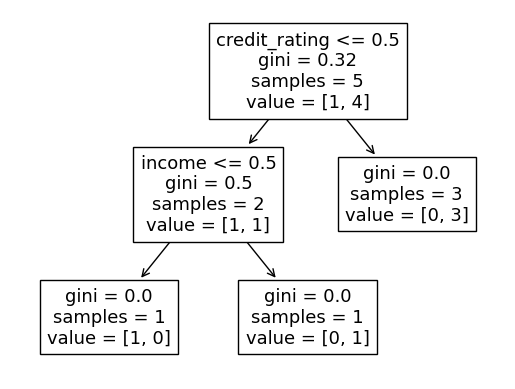

In [188]:
clf = DecisionTreeClassifier(random_state=0, criterion = 'gini')

X = df_temp[['age', 'income', 'student', 'credit_rating']]
y = df_temp['buys_computer']

enc = OrdinalEncoder()
X = enc.fit_transform(X)

print(enc.categories_)

clf.fit(X, y)
_ = plot_tree(clf, feature_names = ['age', 'income', 'student', 'credit_rating'])